<a href="https://colab.research.google.com/github/aa57c/CS_5588_DS_Capstone_Assignments/blob/hands_on_assignments/Hands_On_10_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

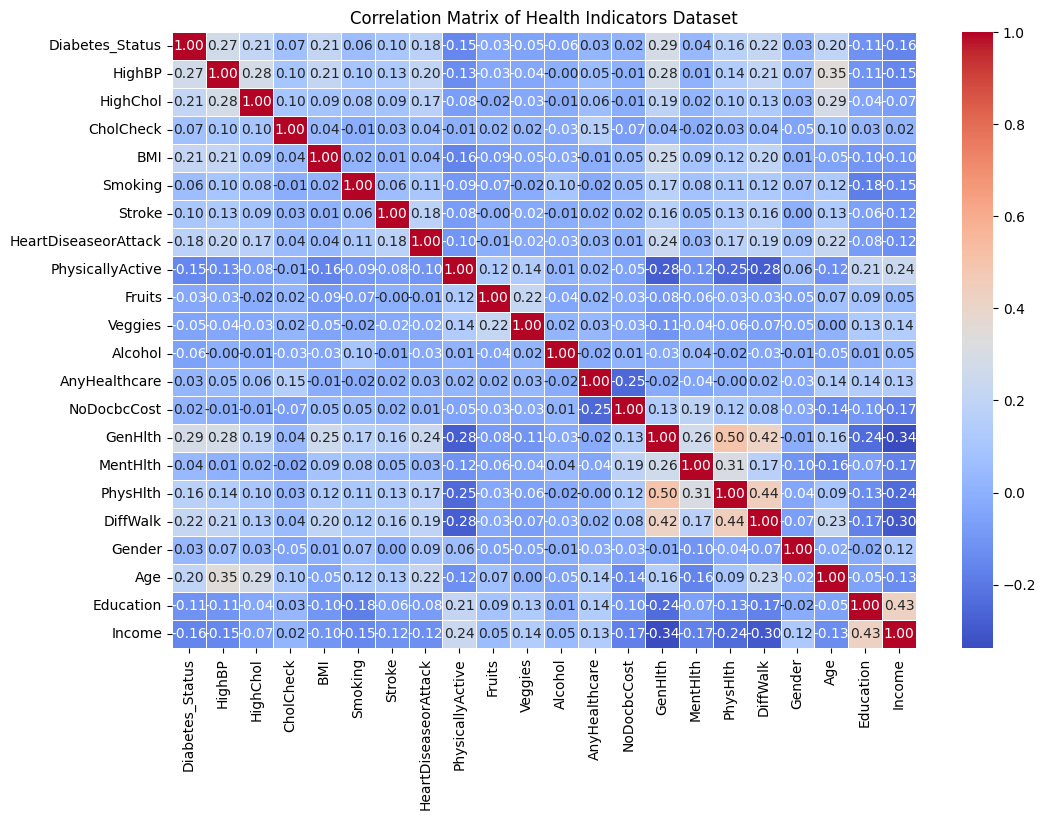

   Diabetes_Status  HighBP  HighChol  CholCheck   BMI  Smoking  Stroke  \
0              0.0       0       1.0          1  15.0      1.0     0.0   
1              2.0       1       0.0          1  28.0      0.0     0.0   
2              2.0       1       1.0          1  33.0      0.0     0.0   
3              2.0       0       1.0          1  29.0      0.0     1.0   
4              0.0       0       0.0          1  24.0      1.0     0.0   

   HeartDiseaseorAttack  PhysicallyActive  Fruits  ...  AnyHealthcare  \
0                   0.0                 0       1  ...              1   
1                   1.0                 0       1  ...              1   
2                   0.0                 1       1  ...              1   
3                   1.0                 1       1  ...              1   
4                   0.0                 0       0  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Gender  Age  Education  \
0          0.0      5.0      10.0  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
health_indicators_dataset = pd.read_csv('diabetes_012_health_indicators_BRFSS2021.csv')

health_indicators_dataset = health_indicators_dataset.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Rename the outcome column to 'Diabetes_Status'

health_indicators_dataset.rename(columns={'Diabetes_012': 'Diabetes_Status'}, inplace=True)

# Rename the 'Sex' column to 'Gender
health_indicators_dataset.rename(columns={'Sex': 'Gender'}, inplace=True)

# Rename the 'PhysActivity" column to "PhysicallyActive"
health_indicators_dataset.rename(columns={'PhysActivity': 'PhysicallyActive'}, inplace=True)

# Rename the "Smoker" and "HvyHvyAlcoholConsump" to "Smoking" and "Alcohol" respectively
health_indicators_dataset.rename(columns={'Smoker': 'Smoking', 'HvyAlcoholConsump': 'Alcohol'}, inplace=True)

# Compute the correlation matrix
correlation_matrix = health_indicators_dataset.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Health Indicators Dataset')
plt.show()

# printing the head of the dataset
print(health_indicators_dataset.head())

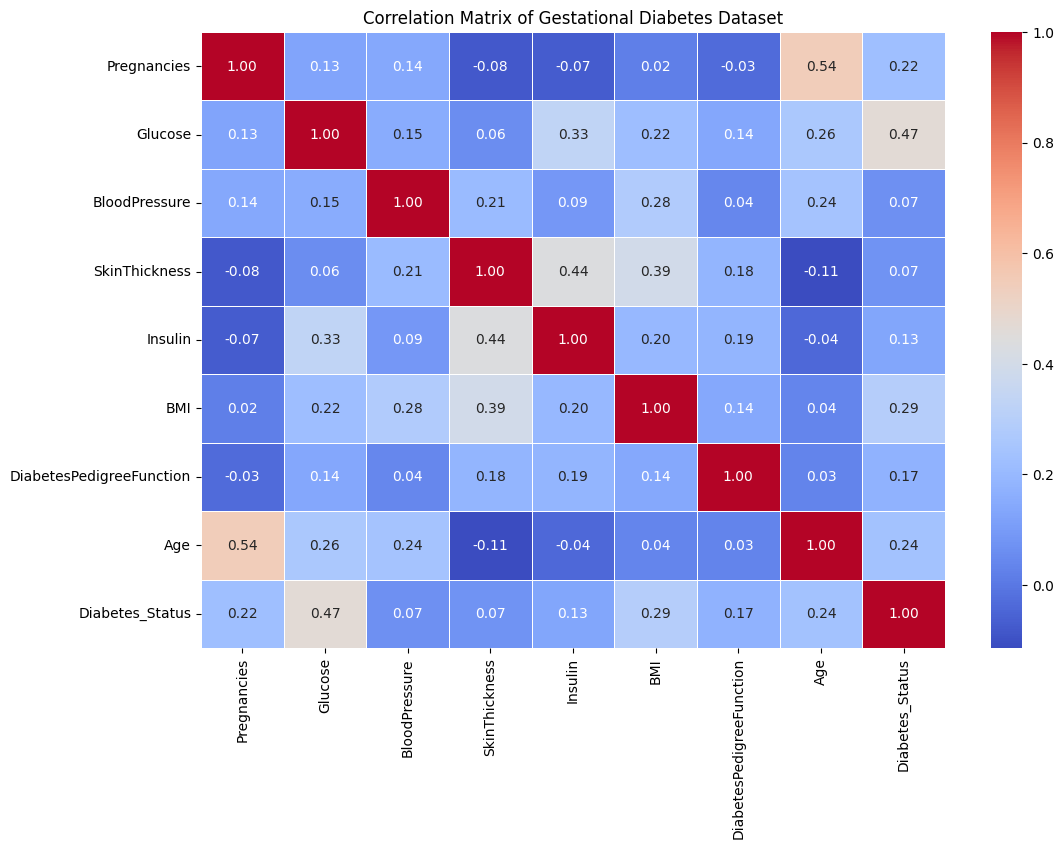

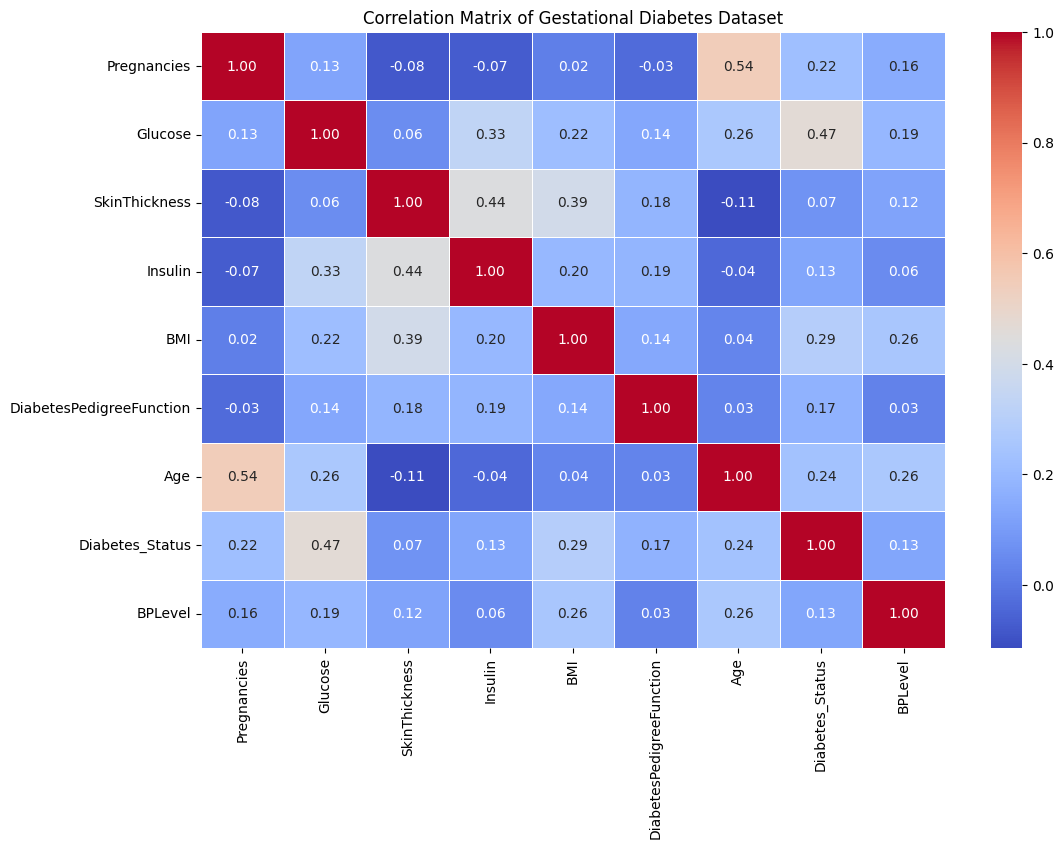

   Pregnancies  Glucose  SkinThickness  Insulin   BMI  \
0            6      148             35        0  33.6   
1            1       85             29        0  26.6   
2            8      183              0        0  23.3   
3            1       89             23       94  28.1   
4            0      137             35      168  43.1   

   DiabetesPedigreeFunction  Age  Diabetes_Status  BPLevel  
0                     0.627   50                3        1  
1                     0.351   31                0        1  
2                     0.672   32                3        1  
3                     0.167   21                0        1  
4                     2.288   33                3        0  


In [3]:
# load dataset
gestational_diabetes_dataset = pd.read_csv('gestational_diabetes_dataset.csv')

gestational_diabetes_dataset = gestational_diabetes_dataset.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Rename the outcome column to 'Diabetes_Status' and map values of 1 to 3
gestational_diabetes_dataset.rename(columns={'Outcome': 'Diabetes_Status'}, inplace=True)
gestational_diabetes_dataset['Diabetes_Status'] = gestational_diabetes_dataset['Diabetes_Status'].map({0: 0, 1: 3})

# Compute the correlation matrix
correlation_matrix = gestational_diabetes_dataset.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Gestational Diabetes Dataset')
plt.show()

# Define a function to classify BP levels based only on Diastolic BP
def classify_bp(row):
    dia_bp = row['BloodPressure']

    if dia_bp < 60:
        return 0  # Low BP
    elif 60 <= dia_bp <= 80:
        return 1  # Normal BP
    else:
        return 2  # High BP

# Apply the function to create the 'BPLevel' column based on diastolic pressure
gestational_diabetes_dataset['BPLevel'] = gestational_diabetes_dataset.apply(classify_bp, axis=1)

# Remove the 'Dia BP' column (and 'Sys BP' if no longer needed)
gestational_diabetes_dataset.drop(['BloodPressure'], axis=1, inplace=True)

# Compute the correlation matrix
correlation_matrix = gestational_diabetes_dataset.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Gestational Diabetes Dataset')
plt.show()



# printing the head of the dataset
print(gestational_diabetes_dataset.head())

In [4]:
# Separating datasets into male and female sample categories
female_data = pd.concat(
    [health_indicators_dataset[health_indicators_dataset['Gender'] == 0],  # Female data
     gestational_diabetes_dataset],  # Gestational diabetes dataset
    axis=0
)

# Check the distribution of Diabetes_Status in the female dataset
print("==== Female Data ====")
print(female_data['Diabetes_Status'].value_counts())

# Set option to display all columns
pd.set_option('display.max_columns', None)  # None means no limit

# Print the DataFrame
print(female_data)

# columns to drop from female dataset
columns_to_drop_female = ["Gender", "HighChol", "CholCheck", "Stroke",
"HeartDiseaseorAttack", "Fruits",
"Veggies", "AnyHealthcare", "NoDocbcCost",
"GenHlth", "MentHlth", "PhysHlth", "DiffWalk",
"Education", "Income", "SkinThickness", "Insulin", "DiabetesPedigreeFunction", "Smoking", "Alcohol"]

# Drop the specified columns from the male and female dataframes
female_data.drop(columns=columns_to_drop_female, inplace=True)

# Print the DataFrame
print(female_data)



==== Female Data ====
Diabetes_Status
0.0    104858
2.0     16103
1.0      2970
3.0       268
Name: count, dtype: int64
     Diabetes_Status  HighBP  HighChol  CholCheck   BMI  Smoking  Stroke  \
0                0.0     0.0       1.0        1.0  15.0      1.0     0.0   
1                2.0     1.0       0.0        1.0  28.0      0.0     0.0   
2                2.0     1.0       1.0        1.0  33.0      0.0     0.0   
5                0.0     1.0       0.0        1.0  40.0      1.0     0.0   
6                0.0     1.0       1.0        1.0  27.0      1.0     0.0   
..               ...     ...       ...        ...   ...      ...     ...   
763              0.0     NaN       NaN        NaN  32.9      NaN     NaN   
764              0.0     NaN       NaN        NaN  36.8      NaN     NaN   
765              0.0     NaN       NaN        NaN  26.2      NaN     NaN   
766              3.0     NaN       NaN        NaN  30.1      NaN     NaN   
767              0.0     NaN       NaN      

In [5]:
# Check class distribution again
print("==== Female Data ====")
print(female_data['Diabetes_Status'].value_counts())

==== Female Data ====
Diabetes_Status
0.0    104858
2.0     16103
1.0      2970
3.0       268
Name: count, dtype: int64


In [6]:
import pandas as pd
import logging
from sklearn.impute import KNNImputer
from tqdm import tqdm  # For progress bar


print('Loading datasets...')  # Add print for testing

# Save the column names before imputation
female_columns = female_data.columns

# Initialize the imputers
knn_imputer = KNNImputer(n_neighbors=5)  # KNN for imputation

logging.info('Applying KNN imputation on female dataset...')
print('Applying KNN imputation on female dataset...')  # Add print for testing
female_data = knn_imputer.fit_transform(female_data)


female_data = pd.DataFrame(female_data, columns=female_columns)


print('Saving imputed male dataset...')  # Add print for testing

print('Saving imputed female dataset...')  # Add print for testing
female_data.to_csv('imputed_female_data.csv', index=False)


print('Imputation process complete.')  # Add print for testing


Loading datasets...
Applying KNN imputation on female dataset...
Saving imputed male dataset...
Saving imputed female dataset...
Imputation process complete.


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report

# Assuming imputed_female_data is your DataFrame
imputed_female_data = pd.read_csv('imputed_female_data.csv')

# Split the dataset into features (X) and target (y)
X = imputed_female_data.drop('Diabetes_Status', axis=1)
y = imputed_female_data['Diabetes_Status']

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# One-hot encoding of the target variable after SMOTE
y_resampled = to_categorical(y_resampled)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a deep neural network model
nn_model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_resampled.shape[1], activation='softmax')  # Change output layer to softmax for multi-class
])

# Compile the model
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model without class weights (since we balanced the classes using SMOTE)
nn_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = nn_model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Optionally, print the classification report
y_pred = nn_model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability
y_test_classes = np.argmax(y_test, axis=1)  # Convert one-hot to class indices
print(classification_report(y_test_classes, y_pred_classes))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8389/8389 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.6506 - loss: 0.7251 - val_accuracy: 0.6948 - val_loss: 0.6295
Epoch 2/20
8389/8389 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.7105 - loss: 0.6047 - val_accuracy: 0.7219 - val_loss: 0.5855
Epoch 3/20
8389/8389 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.7220 - loss: 0.5830 - val_accuracy: 0.7296 - val_loss: 0.5763
Epoch 4/20
8389/8389 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.7286 - loss: 0.5717 - val_accuracy: 0.7363 - val_loss: 0.5620
Epoch 5/20
8389/8389 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7313 - loss: 0.5640 - val_accuracy: 0.7354 - val_loss: 0.5594
Epoch 6/20
8389/8389 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7342 - loss: 0.5578 - val_accuracy: 0.7423 - val_loss: 0.5522
Epoch 7/20
8389/8389 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.7379 - loss: 0.5504 - val_accuracy: 0.7263 - val_loss: 0.5566
Epoch 8/20
8389/8389 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.7387 - loss: 0.5478 - val

In [10]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, np.argmax(y_train, axis=1))  # Use integer labels for Random Forest

# Get predictions from both models (Random Forest + Neural Network)
rf_preds = rf_model.predict(X_test_scaled)  # Predicted class labels
nn_preds = np.argmax(nn_model.predict(X_test_scaled), axis=1)  # Convert softmax output to class labels

# Ensemble: Majority Voting
# Since both `rf_preds` and `nn_preds` are class labels, we can find the majority vote
ensemble_preds = np.array([np.bincount([rf, nn]).argmax() for rf, nn in zip(rf_preds, nn_preds)])

# Evaluate the ensemble model
print("Ensemble Model Accuracy:", accuracy_score(np.argmax(y_test, axis=1), ensemble_preds))
print("Classification Report:\n", classification_report(np.argmax(y_test, axis=1), ensemble_preds))


2622/2622 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Ensemble Model Accuracy: 0.794461597148545
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.80      0.73     20918
           1       0.74      0.68      0.71     21090
           2       0.77      0.70      0.73     20841
           3       1.00      1.00      1.00     21038

    accuracy                           0.79     83887
   macro avg       0.80      0.79      0.79     83887
weighted avg       0.80      0.79      0.79     83887



In [11]:
import joblib
joblib.dump(rf_model, 'rf_model.pkl')
nn_model.save('nn_model.h5')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [12]:
!pip install Flask pyngrok

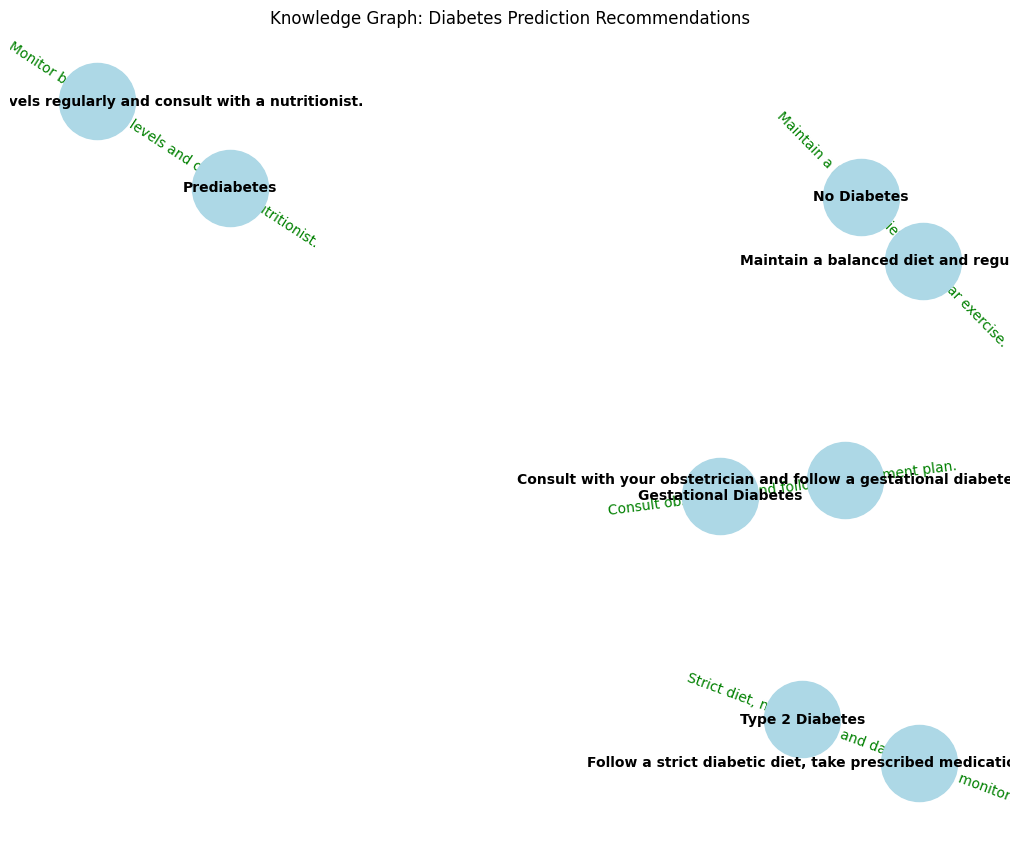

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph():
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes for the prediction outcomes and their recommendations
    G.add_node('No Diabetes', color='lightgreen')
    G.add_node('Prediabetes', color='orange')
    G.add_node('Type 2 Diabetes', color='red')
    G.add_node('Gestational Diabetes', color='pink')

    # Add edges representing the relationships between predictions and their recommendations
    G.add_edge('No Diabetes', 'Maintain a balanced diet and regular exercise.',
               recommendation='Maintain a balanced diet and regular exercise.')
    G.add_edge('Prediabetes', 'Monitor blood sugar levels regularly and consult with a nutritionist.',
               recommendation='Monitor blood sugar levels and consult a nutritionist.')
    G.add_edge('Type 2 Diabetes', 'Follow a strict diabetic diet, take prescribed medications, and monitor glucose daily.',
               recommendation='Strict diet, medication, and daily glucose monitoring.')
    G.add_edge('Gestational Diabetes', 'Consult with your obstetrician and follow a gestational diabetes management plan.',
               recommendation='Consult obstetrician and follow management plan.')

    # Set the position of the nodes for better visualization
    pos = nx.spring_layout(G, seed=42)

    # Get edge labels
    edge_labels = nx.get_edge_attributes(G, 'recommendation')

    # Draw the graph
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green')

    # Set the title and show the graph
    plt.title("Knowledge Graph: Diabetes Prediction Recommendations")
    plt.show()

# Call the function to display the graph
visualize_graph()


In [15]:
!ngrok config add-authtoken 2natGggJ9DyXBu2kROy0WdbERvQ_5TpEgJUKk7eEKSYRnPps9

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [18]:
from flask import Flask, request, jsonify, render_template_string
import joblib
from tensorflow.keras.models import load_model
from pyngrok import ngrok
import numpy as np

# Load the models and scaler
rf_model = joblib.load('rf_model.pkl')
nn_model = load_model('nn_model.h5')
scaler = joblib.load('scaler.pkl')

app = Flask(__name__)

# Serve the HTML form
@app.route('/')
def home():
  html_content = '''
  <!DOCTYPE html>
  <html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Diabetes Prediction</title>
</head>
<body>
    <h1>Diabetes Prediction Form</h1>
    <form id="prediction-form">
        <label for="age">Age:</label>
        <input type="number" id="age" name="age" required><br>

        <label for="highbp">High Blood Pressure (1 for Yes, 0 for No):</label>
        <input type="number" id="highbp" name="highbp" required><br>

        <label for="physicallyactive">Physically Active (1 for Yes, 0 for No):</label>
        <input type="number" id="physicallyactive" name="physicallyactive" required><br>

        <label for="bmi">BMI:</label>
        <input type="number" id="bmi" name="bmi" required><br>

        <label for="bplevel">BP Level (0, 1, 2):</label>
        <input type="number" id="bplevel" name="bplevel" required><br>

        <label for="pregnancies">Pregnancies:</label>
        <input type="number" id="pregnancies" name="pregnancies" required><br>

        <label for="glucose">Glucose:</label>
        <input type="number" id="glucose" name="glucose" required><br>

        <button type="button" onclick="makePrediction()">Predict</button>
    </form>
    <div id="result"></div>

    <script>
        function makePrediction() {
            const formData = {
                Age: parseFloat(document.getElementById('age').value),
                HighBP: parseFloat(document.getElementById('highbp').value),
                PhysicallyActive: parseFloat(document.getElementById('physicallyactive').value),
                BMI: parseFloat(document.getElementById('bmi').value),
                BPLevel: parseFloat(document.getElementById('bplevel').value),
                Pregnancies: parseFloat(document.getElementById('pregnancies').value),
                Glucose: parseFloat(document.getElementById('glucose').value)
            };

            fetch('/predict', {
                method: 'POST',
                headers: { 'Content-Type': 'application/json' },
                body: JSON.stringify(formData)
            })
            .then(response => response.json())
            .then(data => {
                document.getElementById('result').innerHTML = `
                    <h2>Prediction Result</h2>
                    <p>Prediction: ${data.prediction}</p>
                    <p>Recommendation: ${data.recommendation}</p>
                `;
            })
            .catch(error => {
                document.getElementById('result').innerHTML = 'Error: ' + error;
            });
        }
    </script>
</body>
</html>
'''
  return render_template_string(html_content)


@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    features = np.array([data['Age'], data['HighBP'], data['PhysicallyActive'], data['BMI'],  data['BPLevel'],
                         data['Pregnancies'], data['Glucose']]).reshape(1, -1)
    features_scaled = scaler.transform(features)

    # Get predictions from both models
    rf_pred = rf_model.predict(features_scaled)
    nn_pred = np.argmax(nn_model.predict(features_scaled), axis=1)

    # Ensemble: Majority voting
    final_pred = np.bincount([rf_pred[0], nn_pred[0]]).argmax()

    # Add recommendations based on the prediction
    recommendation = get_recommendation(final_pred)

    return jsonify({
        'prediction': 'Diabetic' if final_pred != 0 else 'Not Diabetic',
        'recommendation': recommendation
    })

def get_recommendation(prediction):
    if prediction == 0:
        return "Maintain a balanced diet and regular exercise."
    elif prediction == 1:
        return "Monitor blood sugar levels regularly and consult with a nutritionist."
    elif prediction == 2:
        return "Follow a strict diabetic diet, take prescribed medications, and monitor glucose daily."
    elif prediction == 3:
        return "Consult with your obstetrician and follow a gestational diabetes management plan."
    return "No recommendation available."

# Set up ngrok to expose the app
public_url = ngrok.connect(5000)
print(f"Public URL: {public_url}")

# Run the app
app.run(port=5000)


Public URL: NgrokTunnel: "https://ba95-34-32-186-163.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [18/Oct/2024 03:51:46] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [18/Oct/2024 03:51:47] "GET /favicon.ico HTTP/1.1" 404 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [18/Oct/2024 03:52:51] "POST /predict HTTP/1.1" 200 -
